In [4]:
from greedysearch.algorithm import GreedyShapeletSearch, fit_svm
from greedysearch.pipeline import features_transform
from shapelettransform.algorithm import ShapeletTransform
from utils.dump_results import dump_object
from utils.dump_results import load_object

from pyts.datasets import load_gunpoint

In [10]:
GSS = load_object('01_top_shapelet_GunPoint_GSS') 
ST = load_object('01_top_shapelet_GunPoint_ST') 


X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

In [5]:
import matplotlib.pyplot as plt
#plt.style.use('classic')
#%matplotlib inline
import numpy as np
import seaborn as sns

/Users/stefan-temp/Desktop/General/Privat/greedy-shapelet-search/venv-hyp-mar/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/stefan-temp/Desktop/General/Privat/greedy-shapelet-search/venv-hyp-mar/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Feature distribution of the top shapelet for the GSS')

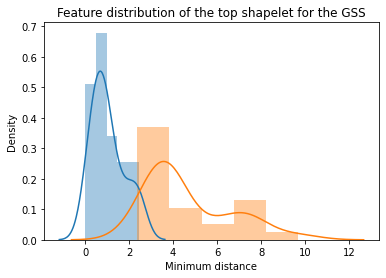

In [11]:
sns.distplot(features_transform(X_train[y_train == 1], GSS))
sns.distplot(features_transform(X_train[y_train == 2], GSS))

plt.xlabel("Minimum distance")
plt.title("Feature distribution of the top shapelet for the GSS")

<AxesSubplot:>

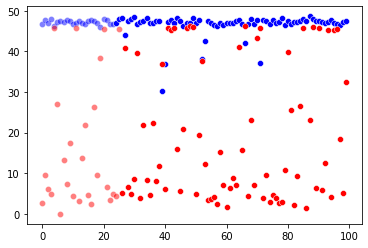

In [12]:
a = features_transform(X_train[y_train == 1], ST).squeeze()
b = features_transform(X_train[y_train == 2], ST).squeeze()
c = features_transform(X_test[y_test == 1], ST).squeeze()
d = features_transform(X_test[y_test == 2], ST).squeeze()

sns.scatterplot(x=np.arange(len(a)),y=a, color = 'b', alpha=0.5)
sns.scatterplot(x=np.arange(len(b)),y=b, color = 'r', alpha = 0.5)
sns.scatterplot(x=np.arange(len(a),len(a)+len(c)),y=c, color = 'b')
sns.scatterplot(x=np.arange(len(b),len(b)+len(d)),y=d, color = 'r')


In [13]:
import pandas as pd

In [27]:

def create_dataframe(X_train, X_test, GSS):
    features_train_gss = features_transform(X_train, GSS).squeeze()
    features_test_gss = features_transform(X_test, GSS).squeeze()
    features_all = np.concatenate([features_train_gss,features_test_gss], axis=0)
    labels_all = np.concatenate([y_train,y_test], axis=0)
    dataset_all = np.array(['train']*len(features_train_gss)+['test']*len(features_test_gss))
    data_gss = np.stack([features_all,labels_all,dataset_all],axis=1)
    df_data = pd.DataFrame(data_gss, columns=['feature','labels','dataset'])
    return df_data

df_gss = create_dataframe(X_train, X_test, GSS)
df_st = create_dataframe(X_train, X_test, ST)

df_gss['method'] = 'GSS'
df_st['method'] = 'ST'

df_all = pd.concat([df_gss,df_st],axis=0)
# print(data_gss.shape)


# df_GSS = pd.DataFrame([])
# dataset_all
# print(features_train_gss.shape)


In [59]:
df_all['feature']=df_all['feature'].astype({'feature': 'float32'})
df_gss['feature']=df_gss['feature'].astype({'feature': 'float32'})
df_st['feature']=df_st['feature'].astype({'feature': 'float32'})

# df_all.dtypes

In [44]:
# df_all.shape
min(df_all['feature'])

max(df_all['feature'])

'9.656062608861799'

/Users/stefan-temp/Desktop/General/Privat/greedy-shapelet-search/venv-hyp-mar/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


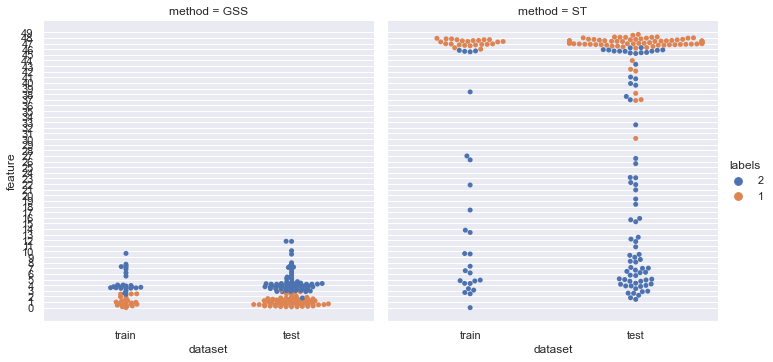

In [57]:
sns.set()
ax = sns.catplot(x="dataset", y="feature",
                 hue="labels", col="method", 
                #  dodge=True,
                 data=df_all, kind="swarm")

plt.yticks(np.arange(min(df_all['feature']), max(df_all['feature'])+1, 1.0))
plt.show()


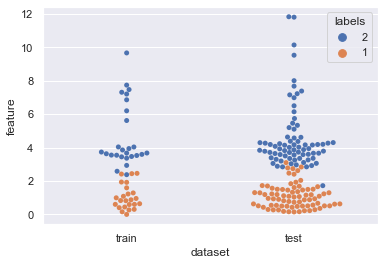

In [60]:
_ = sns.swarmplot(x="dataset", y="feature", hue="labels", data=df_gss)
plt.show()

/Users/stefan-temp/Desktop/General/Privat/greedy-shapelet-search/venv-hyp-mar/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


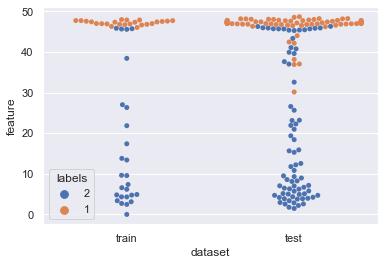

In [61]:
_ = sns.swarmplot(x="dataset", y="feature", hue="labels", data=df_st)
plt.show()

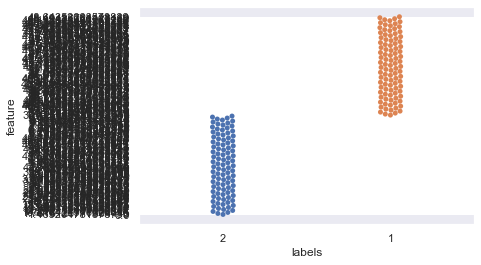

In [37]:
_ = sns.swarmplot(x="labels", y="feature", data=df_st)
plt.show()